In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = '/home/ibrahim/Downloads/data/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(file_path)

In [3]:
plt.style.use('ggplot')

EXPLORATORY DATA ANALYSIS (EDA) AND DATA CLEANING:

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [5]:
import data_tools as dt
df.columns = dt.df_col(df.columns.tolist(),20)

In [6]:
# df_col(df.columns.to_list(),15)
col_list=df.columns.to_list()
col_list

['vin',
 'county',
 'city',
 'state',
 'postal_code',
 'model_year',
 'make',
 'model',
 'evt',
 'cafve',
 'electric_range',
 'base_msrp',
 'legislative_district',
 'dol_vehicle_id',
 'vehicle_location',
 'electric_utility',
 '2020_census_tract']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   143596 non-null  object 
 1   county                143574 non-null  object 
 2   city                  143574 non-null  object 
 3   state                 143596 non-null  object 
 4   postal_code           143574 non-null  float64
 5   model_year            143596 non-null  int64  
 6   make                  143596 non-null  object 
 7   model                 143596 non-null  object 
 8   evt                   143596 non-null  object 
 9   cafve                 143596 non-null  object 
 10  electric_range        143596 non-null  int64  
 11  base_msrp             143596 non-null  int64  
 12  legislative_district  143269 non-null  float64
 13  dol_vehicle_id        143596 non-null  int64  
 14  vehicle_location      143571 non-null  object 
 15  

In [8]:
df.describe()

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
count,143574.000000,143596.000000,143596.000000,143596.000000,143269.000000,1.435960e+05,1.435740e+05
mean,98175.212824,2019.865574,70.495738,1373.386515,29.371748,2.092015e+08,5.297590e+10
std,2383.169088,3.016004,97.128735,9450.067747,14.823899,8.353700e+07,1.594040e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668338e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111039e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364520e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [9]:
na_count=list()
col=list()
for i in df.columns:
    na_count.append(df[df[i].isna()==True][i].count())
    col.append(i)
df_na=pd.DataFrame({'columns':col,'count':na_count})
df_na

,columns,count
0,vin,0
1,county,0
2,city,0
3,state,0
4,postal_code,0
5,model_year,0
6,make,0
7,model,0
8,evt,0
9,cafve,0


In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143266 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   143266 non-null  object 
 1   county                143266 non-null  object 
 2   city                  143266 non-null  object 
 3   state                 143266 non-null  object 
 4   postal_code           143266 non-null  float64
 5   model_year            143266 non-null  int64  
 6   make                  143266 non-null  object 
 7   model                 143266 non-null  object 
 8   evt                   143266 non-null  object 
 9   cafve                 143266 non-null  object 
 10  electric_range        143266 non-null  int64  
 11  base_msrp             143266 non-null  int64  
 12  legislative_district  143266 non-null  float64
 13  dol_vehicle_id        143266 non-null  int64  
 14  vehicle_location      143266 non-null  object 
 15  

In [11]:
df['dummy'] = 1

Text(0.5, 1.0, 'Correlation Matrix of Numeric Columns in DataFramewhy is iloc not working in dask')

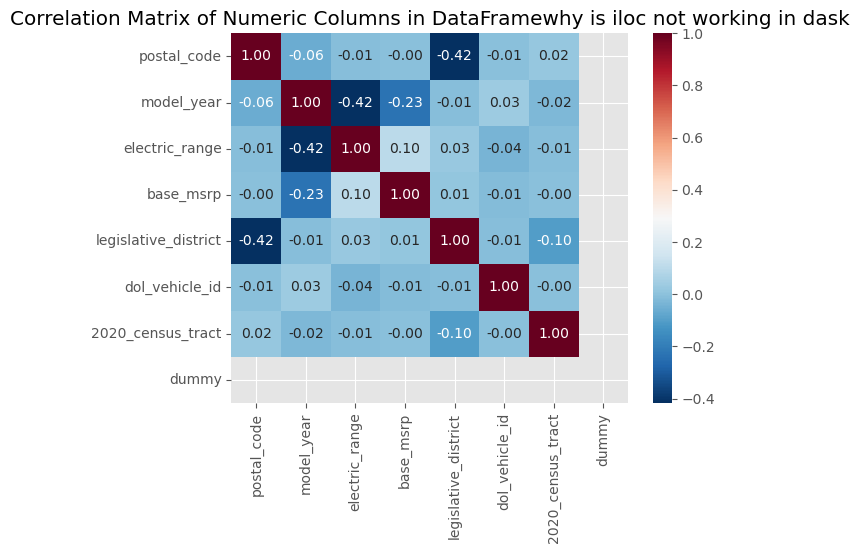

In [12]:
corr_mat = df.corr()
sns.heatmap(corr_mat ,annot = True,fmt='.2f',cmap='RdBu_r')
plt.title('Correlation Matrix of Numeric Columns in DataFramewhy is iloc not working in dask')

SPLIT THE DATAFRAME TO ONLY EXPLORE ELECTRIC VEHICLES FOR NOW (DATA ANALYSIS OF EV):

In [13]:
df_ev = df[df.evt.isin(['Battery Electric Vehicle (BEV)'])]
print(df_ev[df_ev.electric_range==0].count())

vin                     63840
county                  63840
city                    63840
state                   63840
postal_code             63840
model_year              63840
make                    63840
model                   63840
evt                     63840
cafve                   63840
electric_range          63840
base_msrp               63840
legislative_district    63840
dol_vehicle_id          63840
vehicle_location        63840
electric_utility        63840
2020_census_tract       63840
dummy                   63840
dtype: int64


In [14]:
df_ev2 = df_ev[df_ev['cafve']=='Clean Alternative Fuel Vehicle Eligible']

In [15]:
print(df_ev2[df_ev2['electric_range']==0].count())

vin                     0
county                  0
city                    0
state                   0
postal_code             0
model_year              0
make                    0
model                   0
evt                     0
cafve                   0
electric_range          0
base_msrp               0
legislative_district    0
dol_vehicle_id          0
vehicle_location        0
electric_utility        0
2020_census_tract       0
dummy                   0
dtype: int64


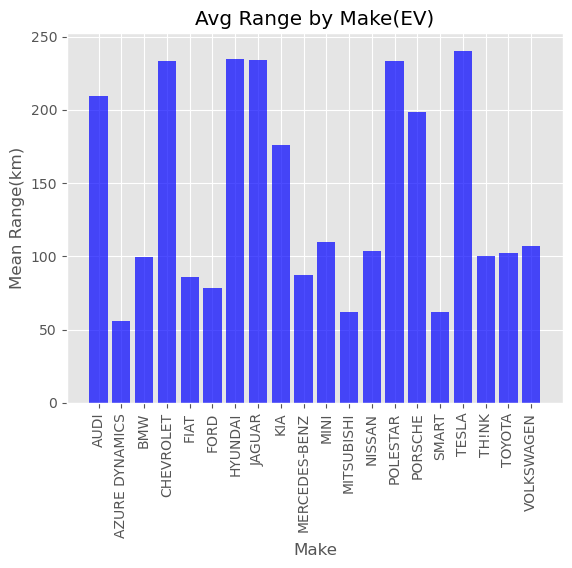

In [16]:
avg_rng_mk = df_ev2.groupby('make')['electric_range'].agg('mean')
ev_make = df_ev2['make'].sort_values().unique()
avg_rng=pd.DataFrame({'make':ev_make,'avg_rng':avg_rng_mk})
plt.bar(avg_rng['make'],avg_rng['avg_rng'],color='b',alpha=0.7)
plt.xlabel('Make')
plt.ylabel("Mean Range(km)")
plt.title('Avg Range by Make(EV)')
plt.xticks(rotation = 90)
plt.show()

In [17]:
avg_rng_mk

make
AUDI              209.367250
AZURE DYNAMICS     56.000000
BMW                99.437838
CHEVROLET         233.241736
FIAT               85.626683
FORD               78.054054
HYUNDAI           234.914062
JAGUAR            234.000000
KIA               176.213756
MERCEDES-BENZ      87.000000
MINI              110.000000
MITSUBISHI         61.950820
NISSAN            103.698266
POLESTAR          233.000000
PORSCHE           198.578431
SMART              62.313653
TESLA             240.243914
TH!NK             100.000000
TOYOTA            102.600000
VOLKSWAGEN        107.284916
Name: electric_range, dtype: float64

NameError: name 'ax' is not defined

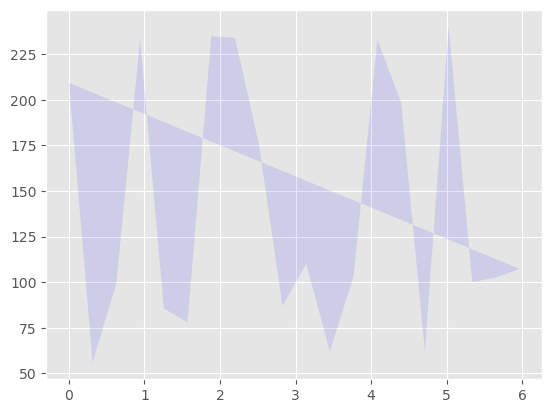

In [18]:
dt.radar_chart(df=avg_rng,categories='make',values='avg_rng')

In [ ]:
ax=sns.boxplot(data=df_ev2,x='electric_range',y='make',color='b')
plt.title('Electric Range by Make of EVs')
plt.ylabel('Make')
plt.xlabel('Electric Range (Miles)')

In [ ]:
ev_count = df_ev['make'].value_counts()
ev_count.plot(kind='bar',color='b',alpha=0.7,logy=True)
plt.title('Number of EVs by make')
plt.ylabel('Number of vehicles (logarithmic)')
plt.xlabel('Make')

In [ ]:
ev_count

In [ ]:
evt_count = pd.pivot_table(data=df,columns='evt',values='dummy',aggfunc='sum',index='make')
evt_count.plot(kind='bar',logy=True,figsize=(10,6))
plt.title('Number of Vehicle by Make and Type')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles (logarithmic)')

In [ ]:
ev_count

In [ ]:
print(avg_rng_mk)

In [ ]:
year = df_ev['model_year'].sort_values(ascending=True).unique()
avg_rng_yr = df_ev.groupby('model_year')['electric_range'].agg('mean')
avg_rng_yr=pd.DataFrame({'year':year,'avg_rng':avg_rng_yr})

plt.scatter(avg_rng_yr['year'], avg_rng_yr['avg_rng'], linestyle = 'dotted', marker = 'x', color = 'blue')
dt.trendline(avg_rng_yr,x='year',y='avg_rng',extend=2025,deg=3)
plt.xlabel('Model Year')
plt.ylabel('Range(Miles)')
plt.title('Range by Model Year (EV)')
plt.show()

In [ ]:
sns.kdeplot(data=df_ev['electric_range'],multiple='layer',c='blue')
plt.title('Electric Range distribution (KDE)')
plt.xlabel('Electric Range(km)')

In [ ]:
sns.histplot(x=df_ev2['electric_range'],bins=40,color='b',alpha=0.7,stat='proportion')
sns.ecdfplot(df_ev2['electric_range'],color='r',stat='proportion')
plt.title('Electric Range Distribution (Histogram)')
plt.show()

In [ ]:
corr_ev = df_ev.corr()
sns.heatmap(corr_ev,annot=True,fmt='.2f')

In [ ]:
rng_make_yr = pd.pivot_table(data=df_ev,values='electric_range',columns='model_year',index='make',aggfunc='mean')
rng_make_yr

In [ ]:
df_ev.head()

In [ ]:
df_ev.state.unique()

In [ ]:
mk_county = pd.pivot_table(data=df_ev,columns='make',index='county',values='dummy',aggfunc='count')
mk_county

In [ ]:
col_list

In [ ]:
ev_share=df_ev.make.value_counts(normalize=True,sort=True)

In [ ]:
ev_share

In [ ]:
col = df_ev['make'].unique()
share = list()
for i in col:
    share.append(df_ev[df_ev['make']==i]['make'].count())
total = sum(share)
share /= total
ev_share = pd.DataFrame({'make':col,'share':share})

others = {'make':'OTHERS','share':ev_share[ev_share['share']<0.03]['share'].sum()}
ev_share.loc[len(df_ev)] = others

ev_share.drop(inplace=True,index=ev_share[ev_share['share']<0.03].index)

ev_share.set_index('make',inplace=True)
ev_share.index

ev_share['share'].plot(kind='pie')
plt.title('Market Share')

In [ ]:
df_ev.head()

In [ ]:
import data_tools as dt
x,y = dt.extract_cordinates(list(df_ev['vehicle_location']))

In [ ]:
df_ev['latitude'] = x
df_ev['longitude'] = y

In [ ]:
df_ev['latitude']

In [ ]:
import geopandas as gpd

In [ ]:
# map_bg = gpd.read_file(r'/home/ibrahim/Downloads/data/tl_2016_53_cousub.shp')

In [ ]:
# gdf = gpd.GeoDataFrame(df_ev,geometry=gpd.points_from_xy(df_ev.latitude,df_ev.longitude),crs='EPSG:4326')

In [ ]:
# ax = map_bg.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
# gdf.plot(ax=ax, marker='o', color='blue',markersize=10,alpha=0.7)
# plt.title('Geographical Plot with Map Background')
# plt.xlabel('Longitude')
# # plt.ylabel('Latitude')
# plt.show()

In [ ]:
print('hello \nworld')

In [ ]:
import data_tools as dt

In [ ]:
geo_map = r'/home/ibrahim/Downloads/data/tl_2016_53_cousub.shp'

In [ ]:
df_ev['latitude'].astype(float)
df_ev['longitude'].astype(float)

In [ ]:
dt.geo_plot(df_ev,latitude=df_ev['latitude'],longitude=df_ev['longitude'],file_path=geo_map,title='Location of EVs across WA state',size=(20,20))